<a href="https://colab.research.google.com/github/min207/2023-1-ESAA/blob/main/ESAA230529.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **01. 합성곱 신경망**
- 합성곱 신경망(CNN): 데이터가 가진 특징들의 패턴을 학습하는 알고리즘으로 컴퓨터 비전 분야에 많이 사용됨
  + 이미지 분류, 객체 탐지, 스타일 전이 등

----
### **1-1. 이미지 표현**
- 이미지를 컴퓨터가 이해할 수 있게 하려면 숫자로 표현해야함 
  + 0~255 사이의 숫자로 각 픽셀의 화소 값을 나타내는 방식으로 표현 가능
  + 0은 검은색, 255는 흰색, 중간은 회색으로 표현
  + 화소를 나타내는 숫자는 이미지의 강도를 나타내며, 숫자가 클수록 강한 특성을 가짐

----
### **1-2. 합성곱**
- 합성곱: 입력 이미지에 대하여 일반적으로 정방형 크기를 가지는 커널을 사용하여 입력 이미지에 대한 특성을 추출하는 연산 방법
- 특성맵: 합성곱 연산을 통해서 추출된 이미지
- 입력 이미지의 좌측 상단부터 커널과 같은 크기를 갖도록 입력 이미지의 일부분에 커널이 겹치도록 투영하여 겹치는 부분에 대해 합성곱 연산 수행

----
### **1-3. 채널**
- 채널: 입력 이미지를 구성하는 2차원 배열의 개수
  + 흑백 이미지는 단일 채널
  + 컬러 이미지는 R,G,B 총 3개의 채널을 가짐
- 입력 이미지가 여러 개의 채널을 갖는 경우, 합성곱 연산을 수행할 때 특성맵의 생성과정을 잘 살펴야함
  + 입력 이미지의 채널 개수만큼 커널이 생성되고, 채널마다 하나씩 커널을 적용하여 합성곱 연산 수행
  + 입력 이미지의 채널 개수만큼 합성곱 연산된 결과가 생성되고, element-wise 덧셈 연산으로 모두 더해주면 최종 특성맵 생성

----
### **1-4. 스트라이드**
- 스트라이드: 커널이 좌측 상단으로부터 입력 이미지를 기준으로 우측으로 이동하면서 합성곱 연산을 계속 수행하고 특성맵에 결과를 채워나가는 과정에서 이동하는 간격
  + 1 또는 2로 설정
  + 2로 설정 시 특성맵의 크기가 절반으로 줄어들음
- 텐서플로 케라스에서 제공하는 Conv2D ㄹ이어의 strides 매개변수로 지정

----
### **1-5. 패딩**
- 패딩: 추출된 특성맵의 크기가 입력 이미지 대비 줄어들지 않도록 설정하는 값
- 일반적으로는 zero-padding을 사용하며, 패딩을 적용한 후 합성곱 연산을 수행하면 특성맵의 크기가 줄어들지 않음
- 텐서플로 케라스의 Conv2D 레이어에서 padding = 'same'으로 설정하면 zero-padding 적용 

----
### **1-6. 특성맵 사이즈**
- 패딩과 스트라이드를 적용하고, 입력 데이터와 필터의 크기가 주어졌을 때의 출력 데이터 크기 계산식
$$(Output Height, Output Width) = ( (Image Height + 2P - Kernel Height) / S + 1, (Image Width + 2P - Kernel Width) / S + 1 )$$
  * Image Height, Image Width : 입력 크기(input size)
  * Kernel Height, Kernel Width : 필터 크기(kernel size)
  * S : 스트라이드(strides)
  * P : 패딩(padding)
  * Output Height, Output Width : 출력 크기(output size)

----
### **1-7. 풀링**
- 풀링: 추출된 특성맵에 대해 다운 샘플링하여 이미지의 크기를 축소하는 레이어
  + 이미지 축소를 통해 연산량을 감소시키고 과대적합을 방지한다는 장점이 있음



----
## **02. 간단한 모델 생성**
- 케라스 모델을 구성할 때 사용한 mnist 손글씨 데이터셋을 이용해 간단한 구조의 합성곱 신경망 모델 생성 

----
### **2-1. 데이터 로드 및 전처리**

In [2]:
# tensorflow 모듈 import
import tensorflow as tf

In [3]:
# mnist 손글씨 이미지 데이터 로드
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_valid, y_valid)=mnist.load_data()

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)

11490434/11490434 [==============================] - 1s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


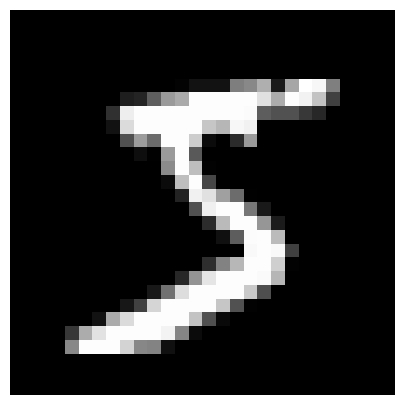

In [4]:
# 샘플 이미지 출력
import matplotlib.pylab as plt

def plot_image(data, idx):
  plt.figure(figsize=(5,5))
  plt.imshow(data[idx], cmap='gray')
  plt.axis('off')
  plt.show()

plot_image(x_train, 0)

In [5]:
print(x_train.min(), x_train.max())
print(x_valid.min(), x_valid.max())

0 255
0 255


- 이미지 픽셀이 0~255 범위의 숫자로 구성된 것을 확인 

In [6]:
# 정규화(Normalization)
x_train = x_train/255.0
x_valid=x_valid/255.0

print(x_train.min(), x_train.max())
print(x_valid.min(), x_valid.max())

0.0 1.0
0.0 1.0


- 0~1 범위로 스케일 정규화 

- mnist 데이터셋은 색상을 나타내는 채널이 1개인 모노 컬러 이미지로 구성되므로 CNN 모델에 주입하기 위해 색상을 나타내는 채널 추가 

In [7]:
# 채널 추가
print(x_train.shape, x_valid.shape)

x_train_in = x_train[..., tf.newaxis]
x_valid_in = x_valid[..., tf.newaxis]

print(x_train.shape, x_valid.shape)

(60000, 28, 28) (10000, 28, 28)
(60000, 28, 28) (10000, 28, 28)


----
### **2-2. Sequential API로 모델 생성 및 학습**
- 합성곱 레이어 1개, 풀링 레이어 1개를 적용하는 간단한 모델 생성
- Flatten 층을 추가하여 1차원 배열로 펼침
- 합성곱은 Conv2D 레이어를 사용하고, (3, 3) 크기의 서로 다른 32가지 종류의 커널 적용, ReLU 활성화 함수 적용 
- 풀링 레이어는 (2, 2) 크기로 최대 풀링 적용
- 최종 분류기는 정답 레이블이 10개의 값을 가지므로 10개의 노드 개수를 지정, 활성화 함수로 softmax 적용 

In [8]:
# Sequential API를 사용해 샘플 모델 생성
model=tf.keras.Sequential([
    #Convolution 적용 (32 filters)
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', # (3,3) 크기의 서로 다른 32가지 종류 커널
                           input_shape=(28, 28, 1), name='conv'),
    #max pooling 적용
    tf.keras.layers.MaxPooling2D((2,2), name='pool'),
    #classifier 출력층
    tf.keras.layers.Flatten(),    # 1차원 배열로 펼쳐준다
    tf.keras.layers.Dense(10, activation='softmax')   # 다중 분류 문제
])

- epoch는 10으로 지정

In [9]:
# 모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history=model.fit(x_train_in, y_train, validation_data=(x_valid_in, y_valid), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.2122 - accuracy: 0.9392 - val_loss: 0.0905 - val_accuracy: 0.9737
Epoch 2/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0810 - accuracy: 0.9768 - val_loss: 0.0688 - val_accuracy: 0.9773
Epoch 3/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0608 - accuracy: 0.9821 - val_loss: 0.0605 - val_accuracy: 0.9810
Epoch 4/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0505 - accuracy: 0.9848 - val_loss: 0.0578 - val_accuracy: 0.9818
Epoch 5/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0420 - accuracy: 0.9875 - val_loss: 0.0518 - val_accuracy: 0.9824
Epoch 6/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0361 - accuracy: 0.9890 - val_loss: 0.0546 - val_accuracy: 0.9817
Epoch 7/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0305 - accuracy: 0.9908 - val_loss: 0.0628 -

In [10]:
model.evaluate(x_valid_in, y_valid)

313/313 [==============================] - 3s 8ms/step - loss: 0.0603 - accuracy: 0.9829


[0.06034717336297035, 0.9829000234603882]

- 약 98%의 정확도 

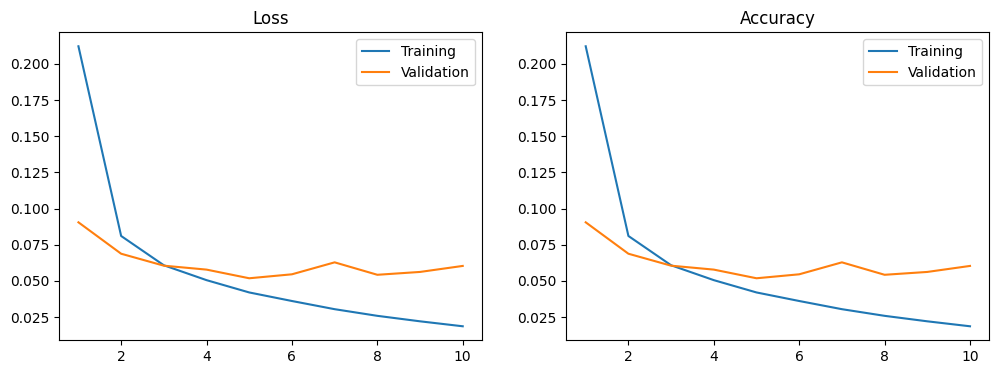

In [11]:
def plot_loss_acc(history, epoch):
  loss, val_loss=history.history['loss'], history.history['val_loss']
  acc, val_acc=history.history['accuracy'], history.history['val_accuracy']

  fig, axes=plt.subplots(1, 2, figsize=(12, 4))

  axes[0].plot(range(1, epoch+1), loss, label='Training')
  axes[0].plot(range(1, epoch+1), val_loss, label='Validation')
  axes[0].legend(loc='best')
  axes[0].set_title('Loss')

  axes[1].plot(range(1, epoch+1), loss, label='Training')
  axes[1].plot(range(1, epoch+1), val_loss, label='Validation')
  axes[1].legend(loc='best')
  axes[1].set_title('Accuracy')

  plt.show()

plot_loss_acc(history, 10)

- 훈련 결과를 history 객체에 저장
- 4 epoch 이후로는 과대적합 

----
### **2-3. 모델 구조 파악**
- 모델 인스턴스에 summary() 메소드를 적용해 모델의 구조 요약
  + 레이어의 이름과 출력 텐서의 형태, 파라미터 개수를 알 수 있음 

- (28, 28, 1) 형태의 입력 텐서가 Conv2D 거치면서 (26, 26, 32) 형태로 변환
  + (3,3) 크기의 합성곱 필터 사용해서 이미지 가로, 세로 크기 2씩 줄어듬
  + 서로 다른 32개의 필터 적용해 특성맵 32개 생성
  + (2,2) 크기의 풀링 레이어 적용해 이미지 크기 절반으로 줄어듬 
  + (13,13,32) 텐서로 변환
  + Flatten 층에서 1차원 텐서로 펼쳐 13x13x32원소 갖는 1차원 벡터

In [12]:
# 모델 구조
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv (Conv2D)               (None, 26, 26, 32)        320       
                                                                 
 pool (MaxPooling2D)         (None, 13, 13, 32)        0         
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________


In [13]:
# 입력 텐서 형태
model.input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv_input')>

In [14]:
# 출력 텐서 형태
model.output

<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dense')>

In [15]:
# 레이어
model.layers

In [16]:
# 첫 번째 레이어 선택
model.layers[0]

In [17]:
# 첫 번째 레이어 입력
model.layers[0].input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv_input')>

In [18]:
# 첫 번째 레이어 출력
model.layers[0].output

<KerasTensor: shape=(None, 26, 26, 32) dtype=float32 (created by layer 'conv')>

- 각 레이어의 가중치 행렬 추출
- 2개의 텐서플로 변수 행렬 확인
  + 1: 커널 행렬의 가중치
  + 2: 커널 행렬의 상수항 

In [19]:
# 첫 번째 레이어 가중치
model.layers[0].weights

[<tf.Variable 'conv/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
 array([[[[ 5.21303713e-01,  4.18226123e-01, -8.45040679e-02,
            1.01828730e+00,  1.08761415e-01,  1.14688031e-01,
           -5.59736371e-01, -1.10860631e-01,  2.74082478e-02,
           -5.94437420e-01,  3.98777127e-01, -8.60449851e-01,
            1.89019367e-01,  2.51961380e-01, -4.10575569e-01,
            3.73404801e-01,  2.12878942e-01,  2.56815284e-01,
           -7.92136669e-01, -1.04402475e-01,  2.26653650e-01,
            2.86663681e-01,  8.90246555e-02,  3.43273252e-01,
           -4.62276265e-02,  1.48497283e-01, -1.13874745e+00,
           -1.40647233e+00, -9.59542394e-02,  6.97168335e-02,
           -4.32029545e-01, -1.09078690e-01]],
 
         [[-8.34864751e-02,  1.16052099e-01,  5.28630435e-01,
           -2.27978930e-01,  8.73306096e-02, -2.91953593e-01,
           -4.01040614e-01,  1.90021783e-01,  4.54210162e-01,
           -1.38152435e-01,  2.91882038e-01, -5.67258056e-03,
           

- 커널 가중치의 shape이 (3, 3, 1, 32): 필터의 크기, 입력층 채널개수, 출력층 채널개수
  + 따라서 학습 가능한 파라미터 수는 총 288개 
- 상수항 가중치의 shape이 (32,): 출력층 채널 수
- 총 학습 가능 파라미터 수는 320개 

In [20]:
# 첫 번째 레이어 커널 가중치
model.layers[0].kernel

<tf.Variable 'conv/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
array([[[[ 5.21303713e-01,  4.18226123e-01, -8.45040679e-02,
           1.01828730e+00,  1.08761415e-01,  1.14688031e-01,
          -5.59736371e-01, -1.10860631e-01,  2.74082478e-02,
          -5.94437420e-01,  3.98777127e-01, -8.60449851e-01,
           1.89019367e-01,  2.51961380e-01, -4.10575569e-01,
           3.73404801e-01,  2.12878942e-01,  2.56815284e-01,
          -7.92136669e-01, -1.04402475e-01,  2.26653650e-01,
           2.86663681e-01,  8.90246555e-02,  3.43273252e-01,
          -4.62276265e-02,  1.48497283e-01, -1.13874745e+00,
          -1.40647233e+00, -9.59542394e-02,  6.97168335e-02,
          -4.32029545e-01, -1.09078690e-01]],

        [[-8.34864751e-02,  1.16052099e-01,  5.28630435e-01,
          -2.27978930e-01,  8.73306096e-02, -2.91953593e-01,
          -4.01040614e-01,  1.90021783e-01,  4.54210162e-01,
          -1.38152435e-01,  2.91882038e-01, -5.67258056e-03,
          -2.02893779e-01, -

In [21]:
# 첫 번째 레이어 bias 가중치
model.layers[0].bias

<tf.Variable 'conv/bias:0' shape=(32,) dtype=float32, numpy=
array([-0.10961436, -0.27951258, -0.19202574,  0.0721234 , -0.36001888,
       -0.20509955, -0.25447655, -0.00825842, -0.0151883 , -0.11391141,
       -0.30619508, -0.02650573, -0.2213883 , -0.04907861, -0.42810372,
        0.12312942, -0.05014568, -0.2771612 , -0.03873394, -0.01499485,
       -0.2626641 , -0.2504435 , -0.21402146, -0.31665665, -0.160894  ,
       -0.19798374, -0.02206693,  0.11432355, -0.3206201 , -0.21299693,
       -0.28351736, -0.11896391], dtype=float32)>

In [22]:
# 레이어 이름 사용해 레이어 선택
model.get_layer('conv')

In [23]:
# 샘플 이미지의 레이어별 출력을 리스트에 추가 (첫 번째, 두 번째 레이어)
activator = tf.keras.Model(inputs=model.input, 
                           outputs=[layer.output for layer in model.layers[:2]])
activations=activator.predict(x_train_in[0][tf.newaxis, ...])

len(activations)

1/1 [==============================] - 0s 104ms/step


2

In [24]:
# 첫 번재 레이어(conv) 출력층
conv_activation=activations[0]
conv_activation.shape

(1, 26, 26, 32)

- 커널은 입력 이미지로부터 서로 다른 피처를 추출하는 역할 

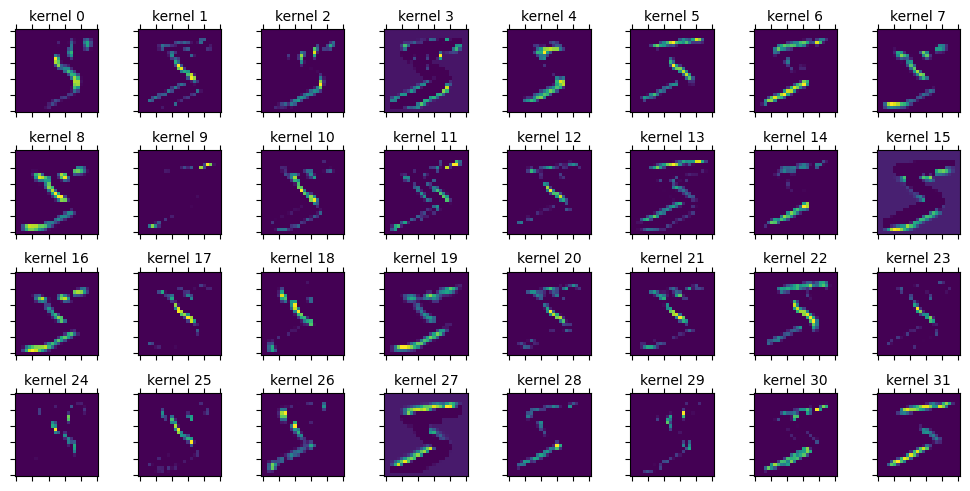

In [25]:
# Convolution 시각화
fig, axes=plt.subplots(4, 8)
fig.set_size_inches(10, 5)

for i in range(32):
  axes[i//8, i%8].matshow(conv_activation[0, :, :, i], cmap='viridis')
  axes[i//8, i%8].set_title('kernel %s'%str(i), fontsize=10)
  plt.setp(axes[i//8, i%8].get_xticklabels(), visible=False)
  plt.setp(axes[i//8, i%8].get_yticklabels(), visible=False)

plt.tight_layout()
plt.show()

In [26]:
# 두번째 레이어 pool 출력층
pooling_activation=activations[1]
print(pooling_activation.shape)

(1, 13, 13, 32)


- 각 커널별로 출력되는 특성맵 이미지를 시각화하면, 앞서 Conv2D 출력 이미지에 비해 화소 크기가 굵어짐
  + 최대 풀링은 인근 픽셀들을 모아ㅓ 최대값으로 고정하기 때문에 픽셀 수는 줄이면서 특징을 더욱 강하게 드러냄 

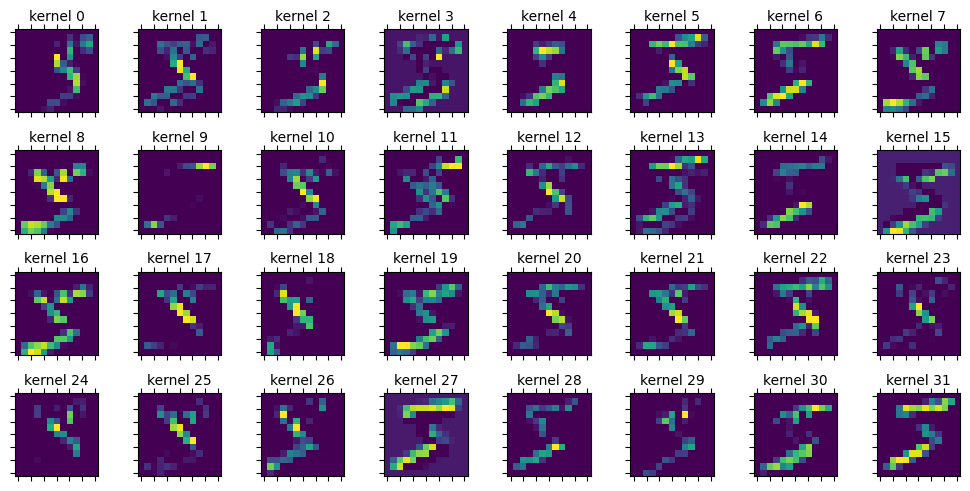

In [27]:
# 시각화
fig, axes=plt.subplots(4, 8)
fig.set_size_inches(10, 5)

for i in range(32):
  axes[i//8, i%8].matshow(pooling_activation[0, :, :, i], cmap='viridis')
  axes[i//8, i%8].set_title('kernel %s'%str(i), fontsize=10)
  plt.setp(axes[i//8, i%8].get_xticklabels(), visible=False)
  plt.setp(axes[i//8, i%8].get_yticklabels(), visible=False)

plt.tight_layout()
plt.show()

## **03. 복잡한 모델 생성**
- 각 레이어 기준으로 다중 입력/출력인 모델 생성

----
### **3-1. 데이터셋 준비**

In [28]:
import tensorflow as tf
import numpy as np

In [29]:
#mnist 손글씨 이미지 데이터 로드
mnist=tf.keras.datasets.mnist
(x_train, y_train), (x_valid, y_valid)=mnist.load_data()

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


- 숫자를 맞추는 정답 외에 홀수인지 짝수인지 판단하는 정답 새로 추가 

In [30]:
# 새로운 출력 값 배열 생성 (홀수 : 1, 짝수 : 0)
y_train_odd=[]
for y in y_train:
  if y%2==0:
    y_train_odd.append(0)
  else:
    y_train_odd.append(1)

y_train_odd=np.array(y_train_odd)
y_train_odd.shape

(60000,)

- 홀짝 여부 정리 확인 

In [31]:
print(y_train[:10])
print(y_train_odd[:10])

[5 0 4 1 9 2 1 3 1 4]
[1 0 0 1 1 0 1 1 1 0]


In [32]:
# Validation 데이터셋 처리
y_valid_odd=[]
for y in y_valid:
  if y%2==0:
    y_valid_odd.append(0)
  else:
    y_valid_odd.append(1)

y_valid_odd=np.array(y_valid_odd)
y_valid_odd.shape

(10000,)

- 입력 이미지 데이터 정규화 후 채널 개수 1로 지정
- expand_dims() 함수에 원본 배열을 입력하고, 새롭게 추가하려는 축의 인덱스를 지정하여 해당 인덱스에 새로운 축 추가
  + 축의 인덱슬를 -1로 지정하면 새로운 축은 끝에 추가됨
  + (60000, 28, 28, 1) 배열로 변환 

In [33]:
# 정규화
x_train=x_train/255.0
x_valid=x_valid/255.0

# 채널 추가
x_train_in=tf.expand_dims(x_train, -1)
x_valid_in=tf.expand_dims(x_valid, -1)

print(x_train_in.shape, x_valid_in.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


### **3-2. Functional API로 다중 입력, 다중 출력 레이어 생성**
- inputs의 경우, Conv2D와 Flatten 레이어의 입력으로 사용됨, 즉 2개의 출력을 가짐 

In [34]:
# Functional API 를 사용하여 모델 생성

inputs=tf.keras.layers.Input(shape=(28, 28, 1))

conv=tf.keras.layers.Conv2D(32, (3, 3), activation='relu')(inputs)
pool=tf.keras.layers.MaxPooling2D((2,2))(conv)
flat=tf.keras.layers.Flatten()(pool)

flat_inputs=tf.keras.layers.Flatten()(inputs)
concat=tf.keras.layers.Concatenate()([flat, flat_inputs])
outputs=tf.keras.layers.Dense(10, activation='softmax')(concat)

model=tf.keras.models.Model(inputs=inputs, outputs=outputs)

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 26, 26, 32)   320         ['input_1[0][0]']                
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 13, 13, 32)   0           ['conv2d[0][0]']                 
                                                                                                  
 flatten_1 (Flatten)            (None, 5408)         0           ['max_pooling2d[0][0]']          
                                                                                            

- 입력 레이어가 2개의 출력으로 나눠지고, 마지막 Dense 레이어를 통과하기 전 Concatenate 레이어에서 하나로 합쳐지는 구조를 시각적으로 확인 

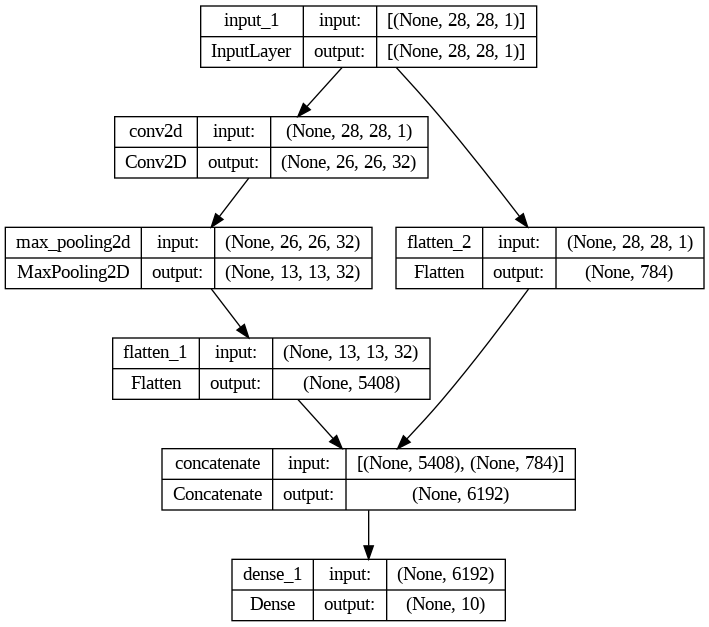

In [35]:
# 모델 구조 출력 및 이미지 파일로 저장
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True, to_file='functional_cnn.png')

In [36]:
# 모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history=model.fit(x_train_in, y_train, validation_data=(x_valid, y_valid), epochs=10)

# 모델 성능
val_loss, val_acc=model.evaluate(x_valid_in, y_valid)
print(val_loss, val_acc)

Epoch 1/10
1875/1875 [==============================] - 39s 20ms/step - loss: 0.2094 - accuracy: 0.9409 - val_loss: 0.1028 - val_accuracy: 0.9690
Epoch 2/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0806 - accuracy: 0.9765 - val_loss: 0.0650 - val_accuracy: 0.9779
Epoch 3/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0605 - accuracy: 0.9817 - val_loss: 0.0562 - val_accuracy: 0.9810
Epoch 4/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0485 - accuracy: 0.9854 - val_loss: 0.0579 - val_accuracy: 0.9820
Epoch 5/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0410 - accuracy: 0.9871 - val_loss: 0.0543 - val_accuracy: 0.9827
Epoch 6/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0341 - accuracy: 0.9891 - val_loss: 0.0589 - val_accuracy: 0.9819
Epoch 7/10
1875/1875 [==============================] - 38s 21ms/step - loss: 0.0288 - accuracy: 0.9911 - val_loss: 0.0585 -

### **3-3. 다중 출력 분류 모델**
- 숫자를 맞추는 것에 더해 홀짝을 구분하는 서로 다른 분류 문제를 예측하는 다중 출력 모델 생성
  + 각기 다른 문제에 맞도록 최종 분류기의 출력 레이어를 2개 만드는 것이 핵심 

In [37]:
# Functional API를 사용해 모델 생성

inputs=tf.keras.layers.Input(shape=(28, 28, 1), name='inputs')

conv=tf.keras.layers.Conv2D(32, (3, 3), activation='relu', name='conv2d_layer')(inputs)
pool=tf.keras.layers.MaxPooling2D((2,2), name='maxpool_layer')(conv)
flat=tf.keras.layers.Flatten(name='flatten_layer')(pool)

flat_inputs=tf.keras.layers.Flatten()(inputs)
concat=tf.keras.layers.Concatenate()([flat, flat_inputs])
digit_outputs=tf.keras.layers.Dense(10, activation='softmax', name='digit_dense')(concat)

odd_outputs=tf.keras.layers.Dense(1, activation='sigmoid', name='odd_dense')(flat_inputs)

model=tf.keras.models.Model(inputs=inputs, outputs=[digit_outputs, odd_outputs])

model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 inputs (InputLayer)            [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d_layer (Conv2D)          (None, 26, 26, 32)   320         ['inputs[0][0]']                 
                                                                                                  
 maxpool_layer (MaxPooling2D)   (None, 13, 13, 32)   0           ['conv2d_layer[0][0]']           
                                                                                                  
 flatten_layer (Flatten)        (None, 5408)         0           ['maxpool_layer[0][0]']          
                                                                                            

In [38]:
# 모델의 입력과 출력을 나타내는 텐서
print(model.input)
print(model.output)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='inputs'), name='inputs', description="created by layer 'inputs'")
[<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'digit_dense')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'odd_dense')>]


- 입력은 하나이고, 출력은 10개인 텐서와 1개인 텐서로 두 개 확인 

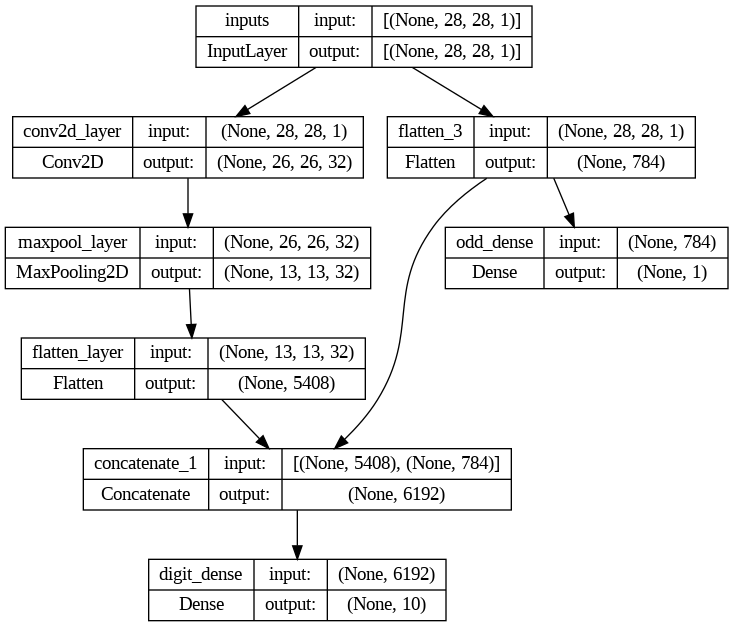

In [39]:
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True, to_file='multi_output_cnn.png')

- 모델 컴파일 시 각각의 출력 Dense 레이어에 name 속성으로 이름을 지정한 것을 key로 하고, 해당 key에 해당하는 레이어에 적용할 손실함수와 가중치를 딕셔너리 형태로 지정해야함 
- fit() 메소드 적용시에도 출력 값을 2개 지정하고, 레이어 이름 속성을 키로 하는 딕셔너리 형태로 각각의 출력에 맞는 정답 배열을 입력 

In [40]:
# 모델 컴파일
model.compile(optimizer='adam',
              loss={'digit_dense': 'sparse_categorical_crossentropy', 
                    'odd_dense':'binary_crossentropy'},
              loss_weights={'digit_dense':1, 'odd_dense':0.5}, 
              # loss = 1.0 * sparse_categorical_crossentropy + 0.5 * binary_crossentropy
              metrics=['accuracy'])

# 모델 훈련
history=model.fit({'inputs':x_train_in},
                  {'digit_dense':y_train, 'odd_dense':y_train_odd},
                   validation_data=({'inputs':x_valid_in}, {'digit_dense':y_valid, 'odd_dense':y_valid_odd}), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 43s 22ms/step - loss: 0.3749 - digit_dense_loss: 0.2124 - odd_dense_loss: 0.3249 - digit_dense_accuracy: 0.9390 - odd_dense_accuracy: 0.8648 - val_loss: 0.2333 - val_digit_dense_loss: 0.0949 - val_odd_dense_loss: 0.2768 - val_digit_dense_accuracy: 0.9714 - val_odd_dense_accuracy: 0.8875
Epoch 2/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.2153 - digit_dense_loss: 0.0795 - odd_dense_loss: 0.2716 - digit_dense_accuracy: 0.9767 - odd_dense_accuracy: 0.8914 - val_loss: 0.2016 - val_digit_dense_loss: 0.0695 - val_odd_dense_loss: 0.2642 - val_digit_dense_accuracy: 0.9771 - val_odd_dense_accuracy: 0.8962
Epoch 3/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.1918 - digit_dense_loss: 0.0606 - odd_dense_loss: 0.2626 - digit_dense_accuracy: 0.9819 - odd_dense_accuracy: 0.8954 - val_loss: 0.1884 - val_digit_dense_loss: 0.0588 - val_odd_dense_loss: 0.2591 - val_digit_dense_accuracy: 0.9805 -

In [41]:
# 모델 성능
model.evaluate({'inputs':x_valid_in}, {'digit_dense':y_valid, 'odd_dense':y_valid_odd})

313/313 [==============================] - 3s 8ms/step - loss: 0.1889 - digit_dense_loss: 0.0605 - odd_dense_loss: 0.2568 - digit_dense_accuracy: 0.9826 - odd_dense_accuracy: 0.9015


[0.18885169923305511,
 0.06046166270971298,
 0.2567802369594574,
 0.9825999736785889,
 0.9014999866485596]

- 약 90%의 정확도 

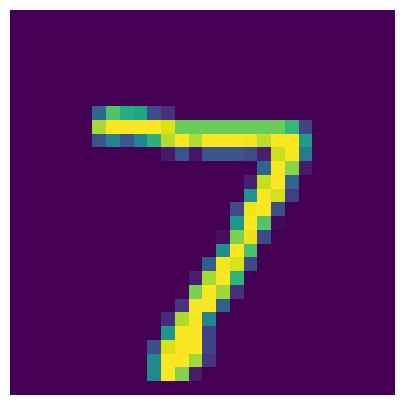

In [42]:
# 샘플 이미지 출력
import matplotlib.pylab as plt

def plot_image(data, idx):
  plt.figure(figsize=(5,5))
  plt.imshow(data[idx])
  plt.axis('off')
  plt.show()

plot_image(x_valid, 0)

In [43]:
digit_preds, odd_preds=model.predict(x_valid_in)
print(digit_preds[0])
print(odd_preds[0])

313/313 [==============================] - 2s 7ms/step
[1.1051489e-12 2.1754026e-10 5.3448139e-09 7.3476275e-07 1.1746407e-11
 9.9228286e-13 1.5962178e-19 9.9999911e-01 2.2774946e-10 7.1473956e-08]
[0.999603]


- argmax 함수를 이용해 예측 확률 실제 정답 레이블로 변환
  + 7로 예측 

In [44]:
digit_labels=np.argmax(digit_preds, axis=1)
digit_labels[0:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 6, 9])

- 홀짝 여부에 대한 예측 레이블 출력
  + 홀수는 1, 짝수는 0으로 정확하게 분류

In [45]:
odd_labels=(odd_preds>0.5).astype(np.int).reshape(1, -1)[0]
odd_labels[0:10]

<ipython-input-45-b68f671b10f9>:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  odd_labels=(odd_preds>0.5).astype(np.int).reshape(1, -1)[0]


array([1, 0, 1, 0, 0, 1, 0, 1, 1, 1])

### **전이 학습**
- 전이 학습: 앞서 훈련한 모델의 일부를 가져와서 그대로 사용하고, 최종 출력층만 새롭게 추가하여 모델을 재구성하는 것 

- 앞에서 학습한 모델에서 입력 레이어부터 flatten_layer라는 name 속성을 갖는 Flatten 층까지 해당하는 부분을 따로 추출하여 base_model 객체 생성
  + (28, 28, 1) 이미지를 받아 5408개의 피처로 특징을 추출/출력하는 모델 

In [46]:
# 앞의 모델에서 flatten_layer 출력을 추출
base_model_output=model.get_layer('flatten_layer').output

# 앞의 출력을 출력으로 하는 모델 정의
base_model=tf.keras.models.Model(inputs=model.input, outputs=base_model_output, name='base')
base_model.summary()

Model: "base"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


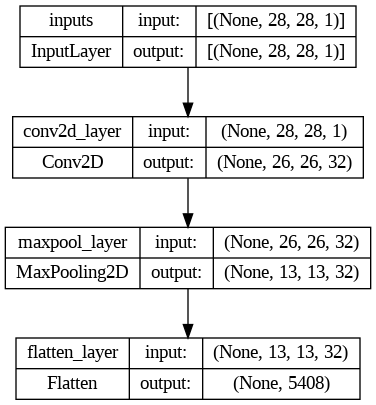

In [47]:
tf.keras.utils.plot_model(base_model, show_shapes=True, show_layer_names=True, to_file='base_model.png')

- base_model을 레이어로 추가하고 최종 분류기 역할을 하는 Dense 레이어를 새롭게 이어서 추가 

In [48]:
# Sequential API 적용
digit_model=tf.keras.Sequential([
    base_model, tf.keras.layers.Dense(10, activation='softmax')
])
digit_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 base (Functional)           (None, 5408)              320       
                                                                 
 dense_2 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________


- 최종적으로 노드 10개를 가진 분류기 역할을 하는 Dense 레이어 추가된 것을 확인 

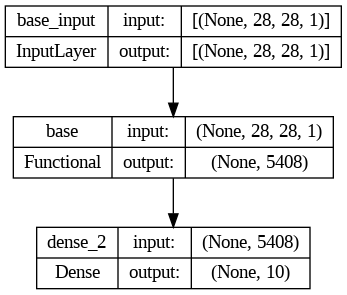

In [49]:
tf.keras.utils.plot_model(digit_model, show_shapes=True, show_layer_names=True, to_file='digit_model.png')

In [50]:
# 모델 컴파일
digit_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history=digit_model.fit(x_train_in, y_train, validation_data=(x_valid_in, y_valid), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.1320 - accuracy: 0.9625 - val_loss: 0.0665 - val_accuracy: 0.9783
Epoch 2/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0579 - accuracy: 0.9829 - val_loss: 0.0572 - val_accuracy: 0.9810
Epoch 3/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0449 - accuracy: 0.9864 - val_loss: 0.0492 - val_accuracy: 0.9841
Epoch 4/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0358 - accuracy: 0.9887 - val_loss: 0.0519 - val_accuracy: 0.9833
Epoch 5/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0295 - accuracy: 0.9910 - val_loss: 0.0485 - val_accuracy: 0.9841
Epoch 6/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0247 - accuracy: 0.9921 - val_loss: 0.0513 - val_accuracy: 0.9836
Epoch 7/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0207 - accuracy: 0.9938 - val_loss: 0.0530 -

- 98.3%의 정확도를 보임 

- 모델 인스턴스는 trainable 속성을 가짐 > False로 지정시 파라미터 값 고정 

In [51]:
# 베이스 모델의 가중치 고정 (Freeze Model)

base_model_frozen=tf.keras.models.Model(inputs=model.input, outputs=base_model_output, name='base_frozen')
base_model_frozen.trainable=False
base_model_frozen.summary()

Model: "base_frozen"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
Total params: 320
Trainable params: 0
Non-trainable params: 320
_________________________________________________________________


- 파라미터를 고정한 base_model_input 모델과 새로운 분류기 역할을 하는 Dense 레이어를 Functional API를 적용하여 구성 

In [52]:
# Functional API 적용
dense_output=tf.keras.layers.Dense(10, activation='softmax')(base_model_frozen.output)
digit_model_frozen=tf.keras.models.Model(inputs=base_model_frozen.input, outputs=dense_output)
digit_model_frozen.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
 dense_3 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,090
Non-trainable params: 320
_____________________________________________________

In [53]:
# 모델 컴파일
digit_model_frozen.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history=digit_model_frozen.fit(x_train_in, y_train, validation_data=(x_valid_in, y_valid), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1177 - accuracy: 0.9685 - val_loss: 0.0591 - val_accuracy: 0.9832
Epoch 2/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0494 - accuracy: 0.9853 - val_loss: 0.0548 - val_accuracy: 0.9823
Epoch 3/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0368 - accuracy: 0.9889 - val_loss: 0.0512 - val_accuracy: 0.9838
Epoch 4/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0282 - accuracy: 0.9917 - val_loss: 0.0503 - val_accuracy: 0.9845
Epoch 5/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0229 - accuracy: 0.9930 - val_loss: 0.0533 - val_accuracy: 0.9837
Epoch 6/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0188 - accuracy: 0.9943 - val_loss: 0.0520 - val_accuracy: 0.9846
Epoch 7/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0162 - accuracy: 0.9949 - val_loss: 0.0527 - val_a

- 모델 전체가 아니라 특정 레이어를 지정하여 파라미터가 업데이트 되지 않도록 고정 

In [54]:
# 베이스 모델의 Conv2D 레이어의 가중치만 고정 (Freeze Layer)

base_model_frozen2=tf.keras.models.Model(inputs=model.input, outputs=base_model_output, name='base_frozen2')
base_model_frozen2.get_layer('conv2d_layer').trainable=False
base_model_frozen2.summary()

Model: "base_frozen2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
Total params: 320
Trainable params: 0
Non-trainable params: 320
_________________________________________________________________


- 새로운 분류기 역할을 하는 Dense 레이어 연결하여 모델 구성 

In [55]:
# Functional API 적용
dense_output2=tf.keras.layers.Dense(10, activation='softmax')(base_model_frozen2.output)
digit_model_frozen2=tf.keras.models.Model(inputs=base_model_frozen2.input, outputs=dense_output2)
digit_model_frozen2.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
 dense_4 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,090
Non-trainable params: 320
_____________________________________________________

In [56]:
# 모델 컴파일
digit_model_frozen2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history=digit_model_frozen2.fit(x_train_in, y_train, validation_data=(x_valid_in, y_valid), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1176 - accuracy: 0.9684 - val_loss: 0.0573 - val_accuracy: 0.9815
Epoch 2/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0494 - accuracy: 0.9854 - val_loss: 0.0512 - val_accuracy: 0.9842
Epoch 3/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0367 - accuracy: 0.9884 - val_loss: 0.0576 - val_accuracy: 0.9833
Epoch 4/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0274 - accuracy: 0.9916 - val_loss: 0.0454 - val_accuracy: 0.9849
Epoch 5/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0232 - accuracy: 0.9926 - val_loss: 0.0520 - val_accuracy: 0.9846
Epoch 6/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0184 - accuracy: 0.9945 - val_loss: 0.0492 - val_accuracy: 0.9850
Epoch 7/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0153 - accuracy: 0.9956 - val_loss: 0.0608 - val_